In [2]:
##import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from sympy.solvers import solve
from sympy import symbols, Eq
import elegansfunc as elegans
from scipy.integrate import odeint

In [3]:
#import necessary datasets
dataset=pd.read_excel('./dataset.xlsx') #taken from Entchev et al., 2015
by_15C=dataset[dataset['temperature']==15]
by_20C=dataset[dataset['temperature']==20]
by_25C=dataset[dataset['temperature']==25]

## Visualizing the datasets

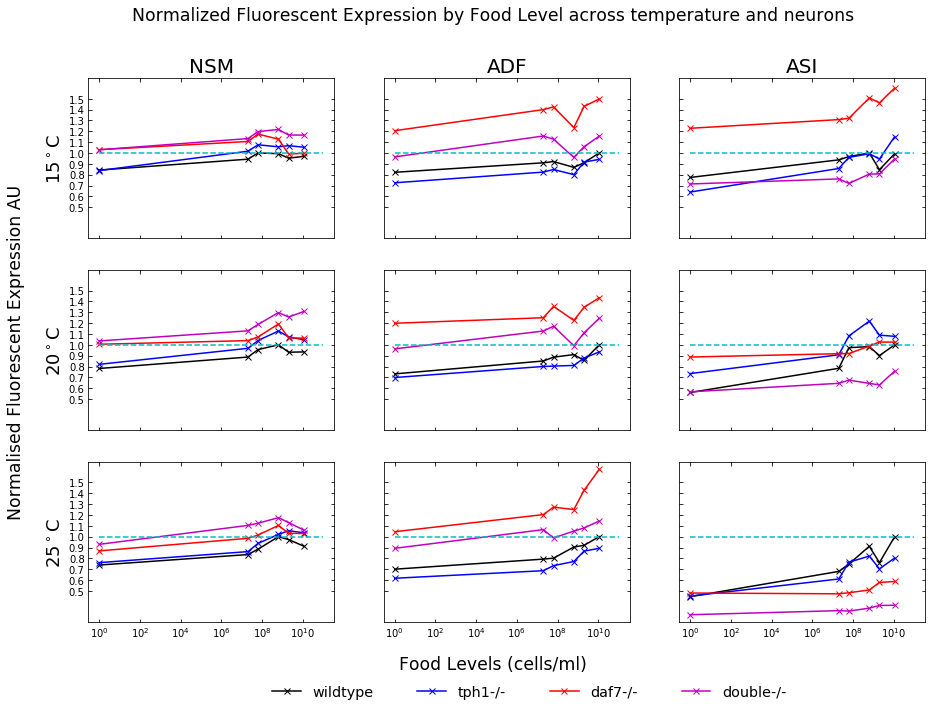

In [4]:
f,axes=plt.subplots(3,3,sharey=True,sharex=True,figsize=(15,10))
neuron=['NSM','ADF','ASI']
normalized_datasets=(elegans.normalize_by_highest_wildtype_mean(by_15C),
                    elegans.normalize_by_highest_wildtype_mean(by_20C),
                    elegans.normalize_by_highest_wildtype_mean(by_25C))
temp=['15','20','25']
for row in range(3):
    for column in range(3):
        ax=axes[row,column]
        elegans.ax_plot(ax,normalized_datasets[row],neuron[column])
        ax.set_xscale('log')
        ax.set_xticks([1e0,1e2,1e4,1e6,1e8,1e10])
        ax.set_xticklabels(['$10^0$','$10^2$','$10^4$','$10^6$','$10^8$','$10^10$'])
        ax.set_yticks(np.linspace(0.5,1.5,11))
        ax.tick_params(top=True,right=True,direction='in')
        if row==0:
            ax.set_title(neuron[column],fontdict={'fontsize':20})
        if column==0:
            ax.set_ylabel(temp[row]+'$^\circ$'+'C',fontsize=18)
        if ax==axes[2,2]:
            handles, labels = ax.get_legend_handles_labels()
            
f.legend(handles, labels, loc='lower center',mode='expand',ncol=4,bbox_to_anchor=(0.24,0,0.5,0),
         labelspacing=1.2,columnspacing=5,fontsize='x-large',frameon=False)
f.text(0.5, 0.06, 'Food Levels (cells/ml)', ha='center',size='xx-large')
f.text(0.05, 0.5, 'Normalised Fluorescent Expression AU', va='center', rotation='vertical',size='xx-large')
f.suptitle('Normalized Fluorescent Expression by Food Level across temperature and neurons',size='xx-large')
plt.show()

## Example 1. 

### Version 1 model interaction
*(Refer to elegansfunc.py Model to see explanation)*

A model has calculated DA table, TA_TN table


In [4]:
##sanity check #Version1 model:
neuron_NSM=elegans.define_model_interactions('nsm',TN2S=-1,DA2S=-1,TA2S=-1)
neuron_ADF=elegans.define_model_interactions('adf',TA2S=1,TN2S=1,DA2S=-1)
neuron_ASI=elegans.define_model_interactions('asi',TN2S=1,DA2S=1,TA2S=1)
model1=dict({'nsm':neuron_NSM,'asi':neuron_ASI,'adf':neuron_ADF})
Version1=elegans.Model(model1,elegans.normalize_by_highest_wildtype_mean(by_20C))

In [4]:
Version1.model_interactions()

,TAnsm,TNnsm,DAnsm,Snsm
TAnsm,0,0,0,-1
TNnsm,0,0,0,-1
DAnsm,0,0,0,-1
,TAasi,TNasi,DAasi,Sasi
TAasi,0,0,0,1
TNasi,0,0,0,1
DAasi,0,0,0,1
,TAadf,TNadf,DAadf,Sadf
TAadf,0,0,0,1
TNadf,0,0,0,1


#### ODEs for each cells

In [5]:
Version1.model['nsm'].write_equation(True)
Version1.model['adf'].write_equation(True)
Version1.model['asi'].write_equation(True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Calculated DA, TA and TN parameters

In [5]:
Version1.DA_table

,Food,DAnsm,DAasi,DAadf
0,1,0.358071412171474,0.228773037194908,0.514348303380004
1,20000000,0.183242558283122,0.289527525317976,0.449434456502397
2,63200000,0.131925555221439,0.376553643974623,0.421988709876424
3,632000000,0.123631417551307,0.470796160432410,0.184265179698532
4,2000000000,0.156412307196396,0.421432852077968,0.243502425868351
5,11200000000,0.231646325816172,0.296612335196218,0.307388303875164


In [6]:
Version1.TA_TN_table

,Food,TAnsm,TAadf,TAasi,TNnsm,TNadf,TNasi
0,1,-0.496940785271314,0.990262411759002,1.91181924905420,0.623230915730067,-0.946120057487641,-1.96103606844295
1,20000000,-0.252619615183875,0.402625261787017,1.48684314460847,0.387327838594496,-0.366739186739517,-1.52582580516526
2,63200000,-0.0587225556849397,0.334269470787982,0.889786053110840,0.173900446497802,-0.251040085693314,-0.895470294065488
3,632000000,-0.858694057798983,1.06376134434254,3.49435766681753,0.956788303981952,-0.897742692538696,-3.30384161426347
4,2000000000,-0.156563560127989,0.810076662727920,1.42045716330277,0.366050944153113,-0.802534610997304,-1.42277496153937
5,11200000000,0.145819345119914,0.450703383226675,1.09566130902125,0.0227964489903878,-0.430712135862243,-1.23109315213806


### Version 1 model simulation in tph-1 mutant, daf-7 mutant and Wild Type



In [8]:
t=np.linspace(0,30,100) #define time points and iterations
Y0=1 #initial value
food=1#food level defined

#### in tph-1 mutant

In [9]:
#Define the initial parameter, and time
NSM_state_tph1mut=odeint(Version1.simulation_in_tph1mut,Y0,t,args=(food,Version1.model['nsm'].write_equation()))
ADF_state_tph1mut=odeint(Version1.simulation_in_tph1mut,Y0,t,args=(food,Version1.model['adf'].write_equation()))
ASI_state_tph1mut=odeint(Version1.simulation_in_tph1mut,Y0,t,args=(food,Version1.model['asi'].write_equation()))

Text(0.5,1,'Simulation of cell states in tph-1 mutants')

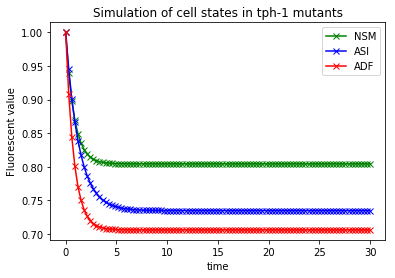

In [10]:
plt.plot(t,NSM_state_tph1mut,'gx-',label='NSM')
plt.plot(t,ASI_state_tph1mut,'bx-',label='ASI')
plt.plot(t,ADF_state_tph1mut,'rx-',label='ADF')
plt.legend()
plt.ylabel('Fluorescent value')
plt.xlabel('time')
plt.title('Simulation of cell states in tph-1 mutants')

#### in daf-7 mutant

In [15]:
#Define the initial parameter, and time
NSM_state_daf7mut=odeint(Version1.simulation_in_daf_7mut,Y0,t,args=(food,Version1.model['nsm'].write_equation()))
ADF_state_daf7mut=odeint(Version1.simulation_in_daf_7mut,Y0,t,args=(food,Version1.model['adf'].write_equation()))
ASI_state_daf7mut=odeint(Version1.simulation_in_daf_7mut,Y0,t,args=(food,Version1.model['asi'].write_equation()))

Text(0.5,1,'Simulation of cell states in daf-7 mutants')

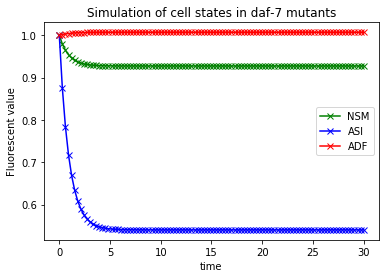

In [16]:
plt.plot(t,NSM_state_daf7mut,'gx-',label='NSM')
plt.plot(t,ASI_state_daf7mut,'bx-',label='ASI')
plt.plot(t,ADF_state_daf7mut,'rx-',label='ADF')
plt.legend()
plt.ylabel('Fluorescent value')
plt.xlabel('time')
plt.title('Simulation of cell states in daf-7 mutants')

#### in Wild type

In [17]:
#Define the initial parameter, and time
NSM_state_WT=odeint(Version1.simulation_in_WT,Y0,t,args=(food,Version1.model['nsm'].write_equation()))
ADF_state_WT=odeint(Version1.simulation_in_WT,Y0,t,args=(food,Version1.model['adf'].write_equation()))
ASI_state_WT=odeint(Version1.simulation_in_WT,Y0,t,args=(food,Version1.model['asi'].write_equation()))

Text(0.5,1,'Simulation of cell states in WT')

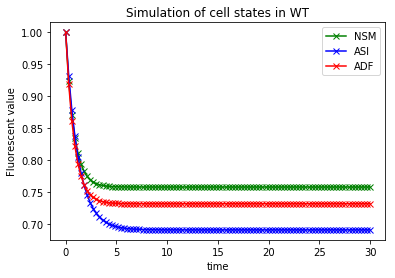

In [18]:
plt.plot(t,NSM_state_WT,'gx-',label='NSM')
plt.plot(t,ASI_state_WT,'bx-',label='ASI')
plt.plot(t,ADF_state_WT,'rx-',label='ADF')
plt.legend()
plt.ylabel('Fluorescent value')
plt.xlabel('time')
plt.title('Simulation of cell states in WT')